# Object Detection Assessment Project Exercise

## Russian License Plate Blurring

The goal is to use Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?

OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files (unfortunately, it does not come with license detectors for other countries!)

In [52]:
import cv2
import matplotlib.pyplot as plt

In [53]:
licence_plate     = cv2.imread("D:/abir/udemy/computer_vision/data/car_plate.jpg")
licence_plate_cor = cv2.cvtColor(licence_plate,cv2.COLOR_BGR2RGB)

In [54]:
def display(img):
    plt.figure(figsize=[16,8])
    plt.imshow(img)

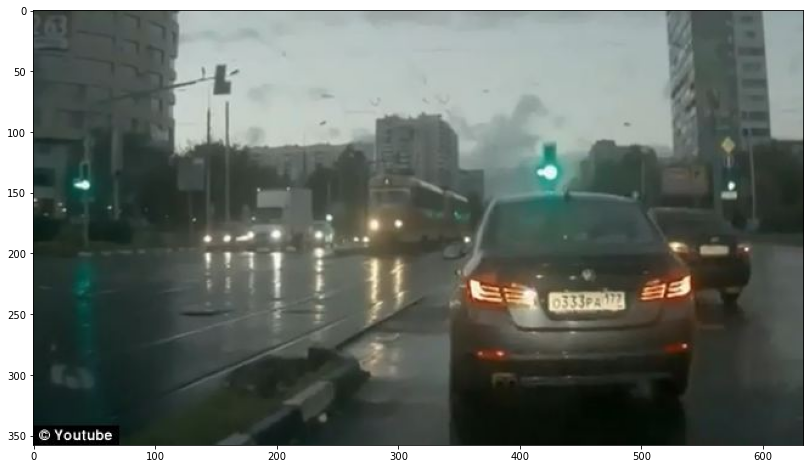

In [55]:
display(licence_plate_cor)

In [56]:
## Initiate cascade classifier
plate_detector = cv2.CascadeClassifier("D:/abir/udemy/computer_vision/data/haarcascades/haarcascade_russian_plate_number.xml")

**TASK: Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.**

In [57]:
def detect_image(img):
    img_copy = img.copy()
    plate_rec = plate_detector.detectMultiScale(licence_plate_cor,scaleFactor=1.2,minNeighbors=5)

    for x,y,w,h in plate_rec:
        cv2.rectangle(img_copy,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=5)

    return img_copy,plate_rec

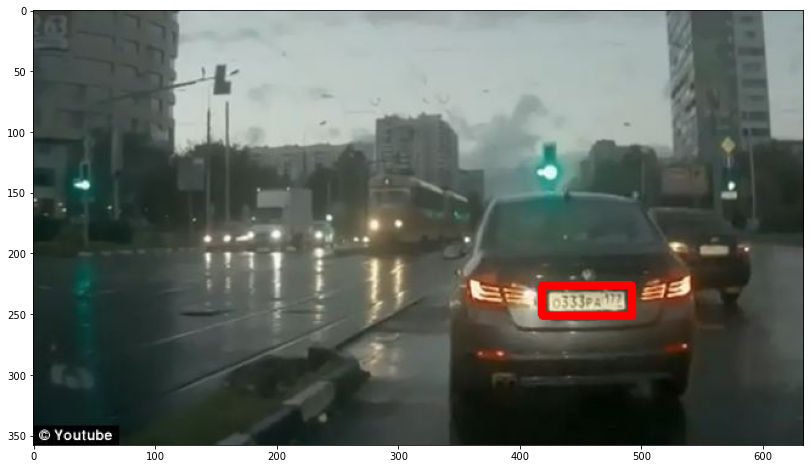

In [58]:
detecte_plate,plate_rec = detect_image(licence_plate_cor)
display(detecte_plate)

**FINAL TASK: Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps we might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (something we covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [59]:
x,y,w,h = plate_rec[0][0],plate_rec[0][1],plate_rec[0][2],plate_rec[0][3]
roi = licence_plate_cor[y:y+h,x:x+w,:]

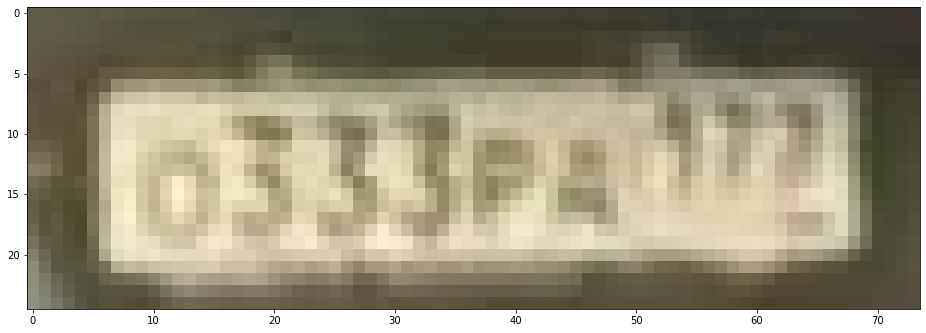

In [60]:
display(roi)

In [61]:
## Adding blur to ROI

blur_roi = cv2.medianBlur(roi,7)

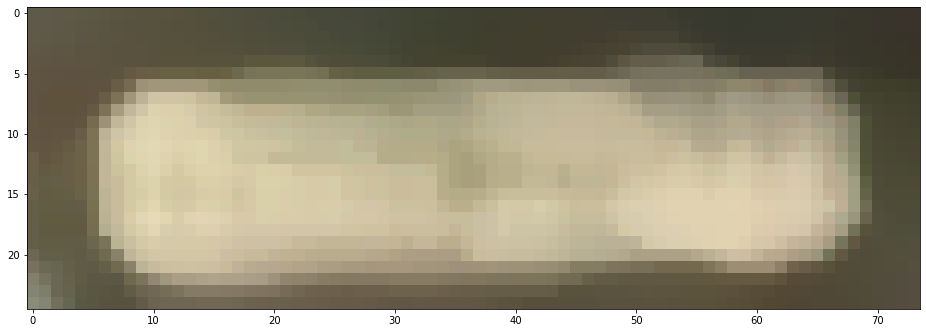

In [62]:
display(blur_roi)

In [63]:
## Attaching blurred ROI with original image
licence_plate_cor_blurred = licence_plate_cor.copy()

licence_plate_cor_blurred[y:y+h,x:x+w,:] = blur_roi

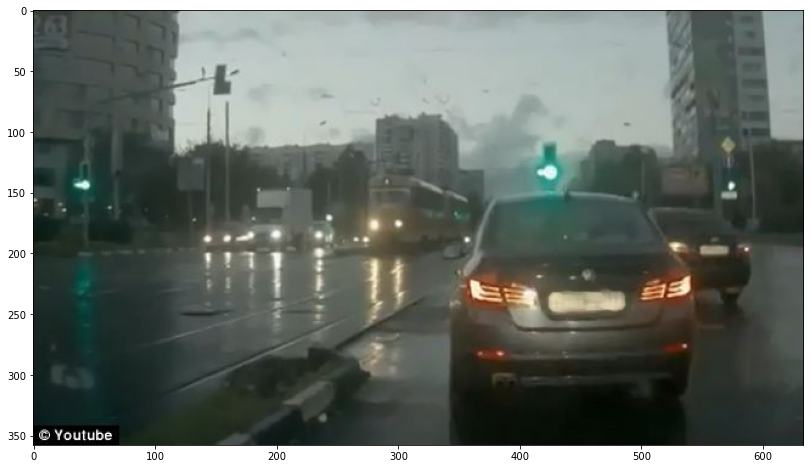

In [64]:
display(licence_plate_cor_blurred)

# Great Job!